<a href="https://colab.research.google.com/github/Rogercodeml123/weatherforecasting/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

url = "https://weatherbit-v1-mashape.p.rapidapi.com/forecast/3hourly"

querystring = {"lat":"35.5","lon":"-78.5"}

headers = {
	"X-RapidAPI-Key": "25ac5876cemsh3504f49774a8a2fp1c7275jsne9420c426250",
	"X-RapidAPI-Host": "weatherbit-v1-mashape.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'data': [{'snow_depth': 0, 'wind_cdir': 'SW', 'rh': 74, 'pod': 'n', 'pres': 1006.5, 'clouds': 1, 'vis': 22.096, 'wind_spd': 1.2, 'wind_cdir_full': 'southwest', 'slp': 1013.6, 'datetime': '2023-07-12:03', 'pop': 0, 'ozone': 308.3, 'dewpt': 19.1, 'uv': 0, 'dni': 0, 'wind_dir': 230, 'clouds_mid': 0, 'timestamp_utc': '2023-07-12T03:00:00', 'dhi': 0, 'timestamp_local': '2023-07-11T23:00:00', 'wind_gust_spd': 1.6, 'weather': {'icon': 'c01n', 'description': 'Clear Sky', 'code': 800}, 'ts': 1689130800, 'temp': 24, 'snow': 0, 'app_temp': 24.4, 'clouds_hi': 0, 'solar_rad': 0, 'clouds_low': 1, 'precip': 0, 'ghi': 0}, {'snow_depth': 0, 'wind_cdir': 'SW', 'rh': 80, 'pod': 'n', 'pres': 1007, 'clouds': 2, 'vis': 18.496, 'wind_spd': 1.2, 'wind_cdir_full': 'southwest', 'slp': 1014.1, 'datetime': '2023-07-12:06', 'pop': 0, 'ozone': 308.3, 'dewpt': 19.1, 'uv': 0, 'dni': 0, 'wind_dir': 230, 'clouds_mid': 0, 'timestamp_utc': '2023-07-12T06:00:00', 'dhi': 0, 'timestamp_local': '2023-07-12T02:00:00', 'wind_

In [2]:
import pandas as pd


In [3]:
with open ("newfile.json","w")as newfile:
  newfile.write(str(response.json()))

In [4]:
import json

data = response.json()
filepath="data.json"
with open (filepath,"w")as json_file:
  json.dump(data,json_file)


In [5]:
df=pd.read_json("data.json")

In [6]:
df.head()

,data,state_code,lon,city_name,country_code,lat,timezone
0,"{'snow_depth': 0, 'wind_cdir': 'SW', 'rh': 74,...",NC,-78.5,Four Oaks,US,35.5,America/New_York
1,"{'snow_depth': 0, 'wind_cdir': 'SW', 'rh': 80,...",NC,-78.5,Four Oaks,US,35.5,America/New_York
2,"{'snow_depth': 0, 'wind_cdir': 'WSW', 'rh': 87...",NC,-78.5,Four Oaks,US,35.5,America/New_York
3,"{'snow_depth': 0, 'wind_cdir': 'WSW', 'rh': 86...",NC,-78.5,Four Oaks,US,35.5,America/New_York
4,"{'snow_depth': 0, 'wind_cdir': 'WSW', 'rh': 63...",NC,-78.5,Four Oaks,US,35.5,America/New_York


In [7]:
df.shape

(40, 7)

In [8]:
df.dtypes

data             object
state_code       object
lon             float64
city_name        object
country_code     object
lat             float64
timezone         object
dtype: object

In [9]:
#df[['column1', 'column2']] = df['city_name'].str.split(' ', 1, expand=True)

### checking missing values in dataset


In [10]:
df.isnull().sum()

data            0
state_code      0
lon             0
city_name       0
country_code    0
lat             0
timezone        0
dtype: int64

### splitting and dropping columns

In [11]:
df = pd.concat([df, df["data"].apply(pd.Series)], axis=1)

In [12]:
df.head()

,data,state_code,lon,city_name,country_code,lat,timezone,snow_depth,wind_cdir,rh,...,weather,ts,temp,snow,app_temp,clouds_hi,solar_rad,clouds_low,precip,ghi
0,"{'snow_depth': 0, 'wind_cdir': 'SW', 'rh': 74,...",NC,-78.5,Four Oaks,US,35.5,America/New_York,0,SW,74,...,"{'icon': 'c01n', 'description': 'Clear Sky', '...",1689130800,24.0,0,24.4,0,0.00000,1,0.0,0.00
1,"{'snow_depth': 0, 'wind_cdir': 'SW', 'rh': 80,...",NC,-78.5,Four Oaks,US,35.5,America/New_York,0,SW,80,...,"{'icon': 'c02n', 'description': 'Few clouds', ...",1689141600,22.7,0,23.1,0,0.00000,2,0.0,0.00
2,"{'snow_depth': 0, 'wind_cdir': 'WSW', 'rh': 87...",NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,87,...,"{'icon': 'c02n', 'description': 'Few clouds', ...",1689152400,21.2,0,21.7,0,0.00000,4,0.0,0.00
3,"{'snow_depth': 0, 'wind_cdir': 'WSW', 'rh': 86...",NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,86,...,"{'icon': 'c02d', 'description': 'Few clouds', ...",1689163200,23.1,0,23.7,0,281.73572,2,0.0,299.05
4,"{'snow_depth': 0, 'wind_cdir': 'WSW', 'rh': 63...",NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,63,...,"{'icon': 'c01d', 'description': 'Clear Sky', '...",1689174000,30.0,0,33.4,0,798.89667,1,0.0,852.61


In [13]:
df.drop(columns="data",inplace=True)

In [14]:
#df.head()

In [15]:
df.dtypes.head()

state_code       object
lon             float64
city_name        object
country_code     object
lat             float64
dtype: object

In [16]:
df = pd.concat([df, df["weather"].apply(pd.Series)], axis=1)

In [17]:
df.head()

,state_code,lon,city_name,country_code,lat,timezone,snow_depth,wind_cdir,rh,pod,...,snow,app_temp,clouds_hi,solar_rad,clouds_low,precip,ghi,icon,description,code
0,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,SW,74,n,...,0,24.4,0,0.00000,1,0.0,0.00,c01n,Clear Sky,800
1,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,SW,80,n,...,0,23.1,0,0.00000,2,0.0,0.00,c02n,Few clouds,801
2,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,87,n,...,0,21.7,0,0.00000,4,0.0,0.00,c02n,Few clouds,801
3,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,86,d,...,0,23.7,0,281.73572,2,0.0,299.05,c02d,Few clouds,801
4,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,63,d,...,0,33.4,0,798.89667,1,0.0,852.61,c01d,Clear Sky,800


In [18]:
df.drop(columns="weather",inplace=True)


In [19]:
df['timestamp_utc'] = pd.to_datetime(df['timestamp_utc'])
df['utc_date'] = df['timestamp_utc'].dt.date
df['utc_time'] = df['timestamp_utc'].dt.time

In [20]:
df.head()

,state_code,lon,city_name,country_code,lat,timezone,snow_depth,wind_cdir,rh,pod,...,clouds_hi,solar_rad,clouds_low,precip,ghi,icon,description,code,utc_date,utc_time
0,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,SW,74,n,...,0,0.00000,1,0.0,0.00,c01n,Clear Sky,800,2023-07-12,03:00:00
1,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,SW,80,n,...,0,0.00000,2,0.0,0.00,c02n,Few clouds,801,2023-07-12,06:00:00
2,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,87,n,...,0,0.00000,4,0.0,0.00,c02n,Few clouds,801,2023-07-12,09:00:00
3,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,86,d,...,0,281.73572,2,0.0,299.05,c02d,Few clouds,801,2023-07-12,12:00:00
4,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,63,d,...,0,798.89667,1,0.0,852.61,c01d,Clear Sky,800,2023-07-12,15:00:00


In [21]:
df['timestamp_local'] = pd.to_datetime(df['timestamp_local'])
df['local_date1'] = df['timestamp_local'].dt.date
df['local_time2'] = df['timestamp_local'].dt.time

In [22]:
df.head()

,state_code,lon,city_name,country_code,lat,timezone,snow_depth,wind_cdir,rh,pod,...,clouds_low,precip,ghi,icon,description,code,utc_date,utc_time,local_date1,local_time2
0,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,SW,74,n,...,1,0.0,0.00,c01n,Clear Sky,800,2023-07-12,03:00:00,2023-07-11,23:00:00
1,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,SW,80,n,...,2,0.0,0.00,c02n,Few clouds,801,2023-07-12,06:00:00,2023-07-12,02:00:00
2,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,87,n,...,4,0.0,0.00,c02n,Few clouds,801,2023-07-12,09:00:00,2023-07-12,05:00:00
3,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,86,d,...,2,0.0,299.05,c02d,Few clouds,801,2023-07-12,12:00:00,2023-07-12,08:00:00
4,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,63,d,...,1,0.0,852.61,c01d,Clear Sky,800,2023-07-12,15:00:00,2023-07-12,11:00:00


In [23]:
df.shape

(40, 44)

In [24]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d:%H')

In [25]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [26]:
df.head()

,state_code,lon,city_name,country_code,lat,timezone,snow_depth,wind_cdir,rh,pod,...,ghi,icon,description,code,utc_date,utc_time,local_date1,local_time2,date,time
0,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,SW,74,n,...,0.00,c01n,Clear Sky,800,2023-07-12,03:00:00,2023-07-11,23:00:00,2023-07-12,03:00:00
1,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,SW,80,n,...,0.00,c02n,Few clouds,801,2023-07-12,06:00:00,2023-07-12,02:00:00,2023-07-12,06:00:00
2,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,87,n,...,0.00,c02n,Few clouds,801,2023-07-12,09:00:00,2023-07-12,05:00:00,2023-07-12,09:00:00
3,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,86,d,...,299.05,c02d,Few clouds,801,2023-07-12,12:00:00,2023-07-12,08:00:00,2023-07-12,12:00:00
4,NC,-78.5,Four Oaks,US,35.5,America/New_York,0,WSW,63,d,...,852.61,c01d,Clear Sky,800,2023-07-12,15:00:00,2023-07-12,11:00:00,2023-07-12,15:00:00


In [27]:
df.drop(columns="timestamp_utc",inplace=True)
df.drop(columns="timestamp_local",inplace=True)
df.drop(columns="datetime",inplace=True)


In [28]:
df.dtypes

state_code         object
lon               float64
city_name          object
country_code       object
lat               float64
timezone           object
snow_depth          int64
wind_cdir          object
rh                  int64
pod                object
pres              float64
clouds              int64
vis               float64
wind_spd          float64
wind_cdir_full     object
slp               float64
pop                 int64
ozone             float64
dewpt             float64
uv                float64
dni               float64
wind_dir            int64
clouds_mid          int64
dhi               float64
wind_gust_spd     float64
ts                  int64
temp              float64
snow                int64
app_temp          float64
clouds_hi           int64
solar_rad         float64
clouds_low          int64
precip            float64
ghi               float64
icon               object
description        object
code                int64
utc_date           object
utc_time    

In [29]:
df['date_'] = pd.to_datetime(df['utc_date'])

In [30]:
df['year'] = df['date_'].dt.year
df['month'] = df['date_'].dt.month
df['day'] = df['date_'].dt.day

In [31]:
df.drop(columns="utc_date",inplace=True)
df.drop(columns="local_date1",inplace=True)
df.drop(columns="local_time2",inplace=True)
df.drop(columns="utc_time",inplace=True)
df.drop(columns="date",inplace=True)
columns_to_drop = ['ghi', 'dhi', 'lon','lat','pres','vis','dni','icon','code']
df = df.drop(columns_to_drop, axis=1)


In [32]:
df.drop(columns="date_",inplace=True)

In [33]:
df.head()

,state_code,city_name,country_code,timezone,snow_depth,wind_cdir,rh,pod,clouds,wind_spd,...,app_temp,clouds_hi,solar_rad,clouds_low,precip,description,time,year,month,day
0,NC,Four Oaks,US,America/New_York,0,SW,74,n,1,1.2,...,24.4,0,0.00000,1,0.0,Clear Sky,03:00:00,2023,7,12
1,NC,Four Oaks,US,America/New_York,0,SW,80,n,2,1.2,...,23.1,0,0.00000,2,0.0,Few clouds,06:00:00,2023,7,12
2,NC,Four Oaks,US,America/New_York,0,WSW,87,n,4,1.2,...,21.7,0,0.00000,4,0.0,Few clouds,09:00:00,2023,7,12
3,NC,Four Oaks,US,America/New_York,0,WSW,86,d,2,1.2,...,23.7,0,281.73572,2,0.0,Few clouds,12:00:00,2023,7,12
4,NC,Four Oaks,US,America/New_York,0,WSW,63,d,1,2.0,...,33.4,0,798.89667,1,0.0,Clear Sky,15:00:00,2023,7,12


In [34]:
df['time'] = df['time'].astype(str)
df[['hours', 'minutes', 'seconds']] = df['time'].str.split(':', expand=True).astype(int)
df.drop(columns="time",inplace=True)

df.head()

,state_code,city_name,country_code,timezone,snow_depth,wind_cdir,rh,pod,clouds,wind_spd,...,solar_rad,clouds_low,precip,description,year,month,day,hours,minutes,seconds
0,NC,Four Oaks,US,America/New_York,0,SW,74,n,1,1.2,...,0.00000,1,0.0,Clear Sky,2023,7,12,3,0,0
1,NC,Four Oaks,US,America/New_York,0,SW,80,n,2,1.2,...,0.00000,2,0.0,Few clouds,2023,7,12,6,0,0
2,NC,Four Oaks,US,America/New_York,0,WSW,87,n,4,1.2,...,0.00000,4,0.0,Few clouds,2023,7,12,9,0,0
3,NC,Four Oaks,US,America/New_York,0,WSW,86,d,2,1.2,...,281.73572,2,0.0,Few clouds,2023,7,12,12,0,0
4,NC,Four Oaks,US,America/New_York,0,WSW,63,d,1,2.0,...,798.89667,1,0.0,Clear Sky,2023,7,12,15,0,0


### checking duplicate rows

In [35]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,state_code,city_name,country_code,timezone,snow_depth,wind_cdir,rh,pod,clouds,wind_spd,...,solar_rad,clouds_low,precip,description,year,month,day,hours,minutes,seconds


In [36]:
df.dtypes

state_code         object
city_name          object
country_code       object
timezone           object
snow_depth          int64
wind_cdir          object
rh                  int64
pod                object
clouds              int64
wind_spd          float64
wind_cdir_full     object
slp               float64
pop                 int64
ozone             float64
dewpt             float64
uv                float64
wind_dir            int64
clouds_mid          int64
wind_gust_spd     float64
ts                  int64
temp              float64
snow                int64
app_temp          float64
clouds_hi           int64
solar_rad         float64
clouds_low          int64
precip            float64
description        object
year                int64
month               int64
day                 int64
hours               int64
minutes             int64
seconds             int64
dtype: object

### chart plotting

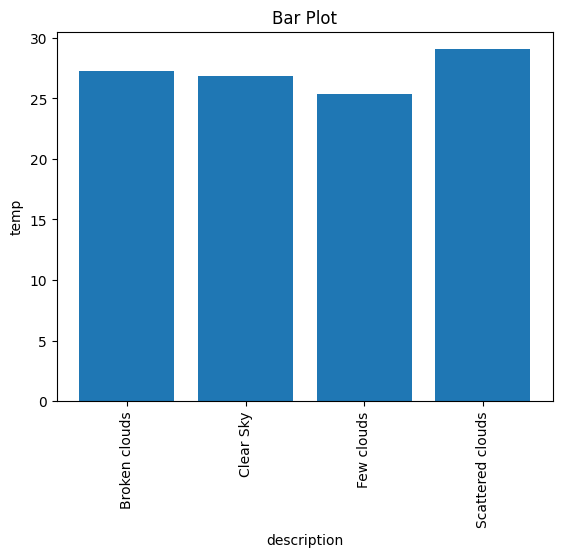

In [37]:
import matplotlib.pyplot as plt

# Group the data by the categorical variable and calculate the mean of the numerical variable
grouped_data = df.groupby('description')['temp'].mean()

# Extract the categories and mean values
categories = grouped_data.index
mean_values = grouped_data.values

# Create the bar plot
plt.bar(categories, mean_values)

# Set the labels and title
plt.xlabel('description')
plt.ylabel('temp')
plt.title('Bar Plot')
bar_width = 0.3
plt.xticks(rotation=90)
plt.show()



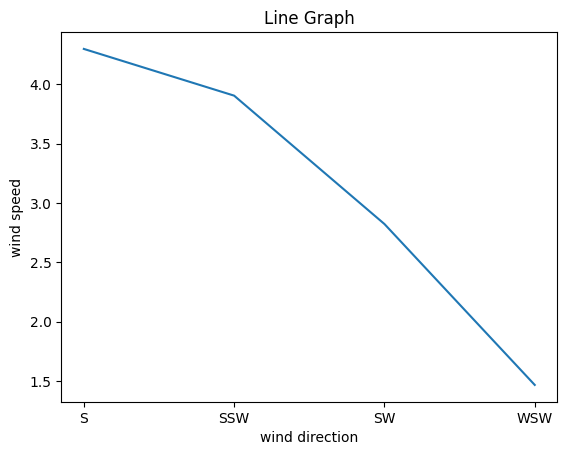

In [38]:
grouped_data = df.groupby('wind_cdir')['wind_spd'].mean()

# Extract the categories and mean values
categories1 = grouped_data.index
mean_values1 = grouped_data.values

# Create the bar plot
plt.plot(categories1, mean_values1)

# Set the labels and title
plt.xlabel('wind direction')
plt.ylabel('wind speed')
plt.title('Line Graph')

plt.show()

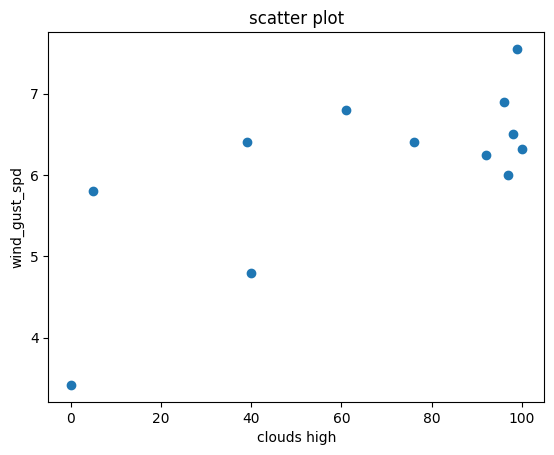

In [39]:
grouped_data = df.groupby('clouds_hi')['wind_gust_spd'].mean()

# Extract the categories and mean values
categories2 = grouped_data.index
mean_values2 = grouped_data.values

# Create the bar plot
plt.scatter(categories2, mean_values2)

# Set the labels and title
plt.xlabel('clouds high')
plt.ylabel('wind_gust_spd')
plt.title('scatter plot')

plt.show()


In [40]:
#df['city_name'].head()

In [41]:
df.shape

(40, 34)

In [42]:
df.isnull().sum().head()

state_code      0
city_name       0
country_code    0
timezone        0
snow_depth      0
dtype: int64

#### Perform one-hot encoding


In [43]:
# Perform one-hot encoding using pandas get_dummies() function
encoded_df = pd.get_dummies(df, columns=['description','city_name','country_code','state_code','timezone','wind_cdir','pod','wind_cdir_full'])

print(encoded_df.head())


   snow_depth  rh  clouds  wind_spd     slp  pop  ozone  dewpt   uv  wind_dir  \
0           0  74       1       1.2  1013.6    0  308.3   19.1  0.0       230   
1           0  80       2       1.2  1014.1    0  308.3   19.1  0.0       230   
2           0  87       4       1.2  1015.1    0  307.8   19.0  0.0       240   
3           0  86       2       1.2  1015.6    0  301.3   20.6  2.0       240   
4           0  63       1       2.0  1015.5    0  300.3   22.2  7.5       240   

   ...  wind_cdir_S  wind_cdir_SSW  wind_cdir_SW  wind_cdir_WSW  pod_d  pod_n  \
0  ...            0              0             1              0      0      1   
1  ...            0              0             1              0      0      1   
2  ...            0              0             0              1      0      1   
3  ...            0              0             0              1      1      0   
4  ...            0              0             0              1      1      0   

   wind_cdir_full_south  w

In [44]:
encoded_df.dtypes

snow_depth                          int64
rh                                  int64
clouds                              int64
wind_spd                          float64
slp                               float64
pop                                 int64
ozone                             float64
dewpt                             float64
uv                                float64
wind_dir                            int64
clouds_mid                          int64
wind_gust_spd                     float64
ts                                  int64
temp                              float64
snow                                int64
app_temp                          float64
clouds_hi                           int64
solar_rad                         float64
clouds_low                          int64
precip                            float64
year                                int64
month                               int64
day                                 int64
hours                             

#### calculation of differ KPI's

In [45]:
mean_temp = encoded_df['temp'].mean()

max_temp = encoded_df['temp'].max()

# Min Temperature
min_temp = encoded_df['temp'].min()

# Temperature Range
temp_range = max_temp - min_temp

# Average Wind Speed
avg_wind_speed = encoded_df['wind_spd'].mean()

# Maximum Wind Gust
max_wind_gust = df['wind_gust_spd'].max()

# Total Sunshine Hours
solar_radiation = df['solar_rad'].sum()


print("Mean Temperature:", mean_temp)
print("Max Temperature:", max_temp)
print("Min Temperature:", min_temp)
print("Temperature Range:", temp_range)
print("Average Wind Speed:", avg_wind_speed)
print("Maximum Wind Gust:", max_wind_gust)
print("Total solar radiation:", solar_radiation)

Mean Temperature: 27.172499999999996
Max Temperature: 32.7
Min Temperature: 21.2
Temperature Range: 11.500000000000004
Average Wind Speed: 3.7410000000000005
Maximum Wind Gust: 8.2
Total solar radiation: 12076.732750000001


### use ml algorithms

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_absolute_error


### Split dataset into training and testing for doing predictions

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame called 'data' with features and target variable
X = encoded_df.drop("wind_dir",axis=1) # Features
y = encoded_df["wind_dir"]  # Target variable

# Perform the test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (32, 43) (32,)
Testing set shape: (8, 43) (8,)


### feature selection through variance threshold method

In [48]:
from sklearn.feature_selection import VarianceThreshold

threshold = VarianceThreshold(threshold=0.0)

threshold.fit_transform(X_train)
#print(X_selected)

array([[77.  , 41.  ,  3.87, ...,  0.  ,  0.  ,  0.  ],
       [51.  , 25.  ,  2.8 , ...,  1.  ,  0.  ,  0.  ],
       [97.  , 70.  ,  5.6 , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [52.  , 24.  ,  4.  , ...,  1.  ,  0.  ,  0.  ],
       [84.  , 60.  ,  4.16, ...,  1.  ,  0.  ,  0.  ],
       [71.  , 42.  ,  4.2 , ...,  1.  ,  0.  ,  0.  ]])

In [49]:
#find non-constant features in true false form
sum(threshold.get_support())

33

In [50]:
len(X_train.columns[threshold.get_support()])

33

In [51]:
constant_columns= [column for column in X_train.columns
                   if column not in X_train.columns [threshold.get_support()]]

print(len(constant_columns))

10


In [52]:
# these are the columns who have 0 variance
for  feature in constant_columns:
  print(feature)

snow_depth
snow
year
month
minutes
seconds
city_name_Four Oaks
country_code_US
state_code_NC
timezone_America/New_York


In [53]:
X_train.drop(constant_columns,axis=1).head()


,rh,clouds,wind_spd,slp,pop,ozone,dewpt,uv,clouds_mid,wind_gust_spd,...,wind_cdir_S,wind_cdir_SSW,wind_cdir_SW,wind_cdir_WSW,pod_d,pod_n,wind_cdir_full_south,wind_cdir_full_south-southwest,wind_cdir_full_southwest,wind_cdir_full_west-southwest
39,77,41,3.87,1010.9,20,290.0,24.7,1.1,0,5.8,...,1,0,0,0,1,0,1,0,0,0
6,51,25,2.80,1013.4,0,298.5,20.6,3.7,0,4.0,...,0,1,0,0,1,0,0,1,0,0
25,97,70,5.60,1013.6,0,289.8,23.6,0.0,51,8.0,...,1,0,0,0,0,1,1,0,0,0
9,87,10,3.20,1013.6,0,294.5,21.4,0.0,0,4.8,...,0,1,0,0,0,1,0,1,0,0
13,54,18,4.00,1012.4,0,289.3,21.9,9.2,0,6.4,...,0,1,0,0,1,0,0,1,0,0


In [54]:
#X_train.corr()

### feature selection through correlation method

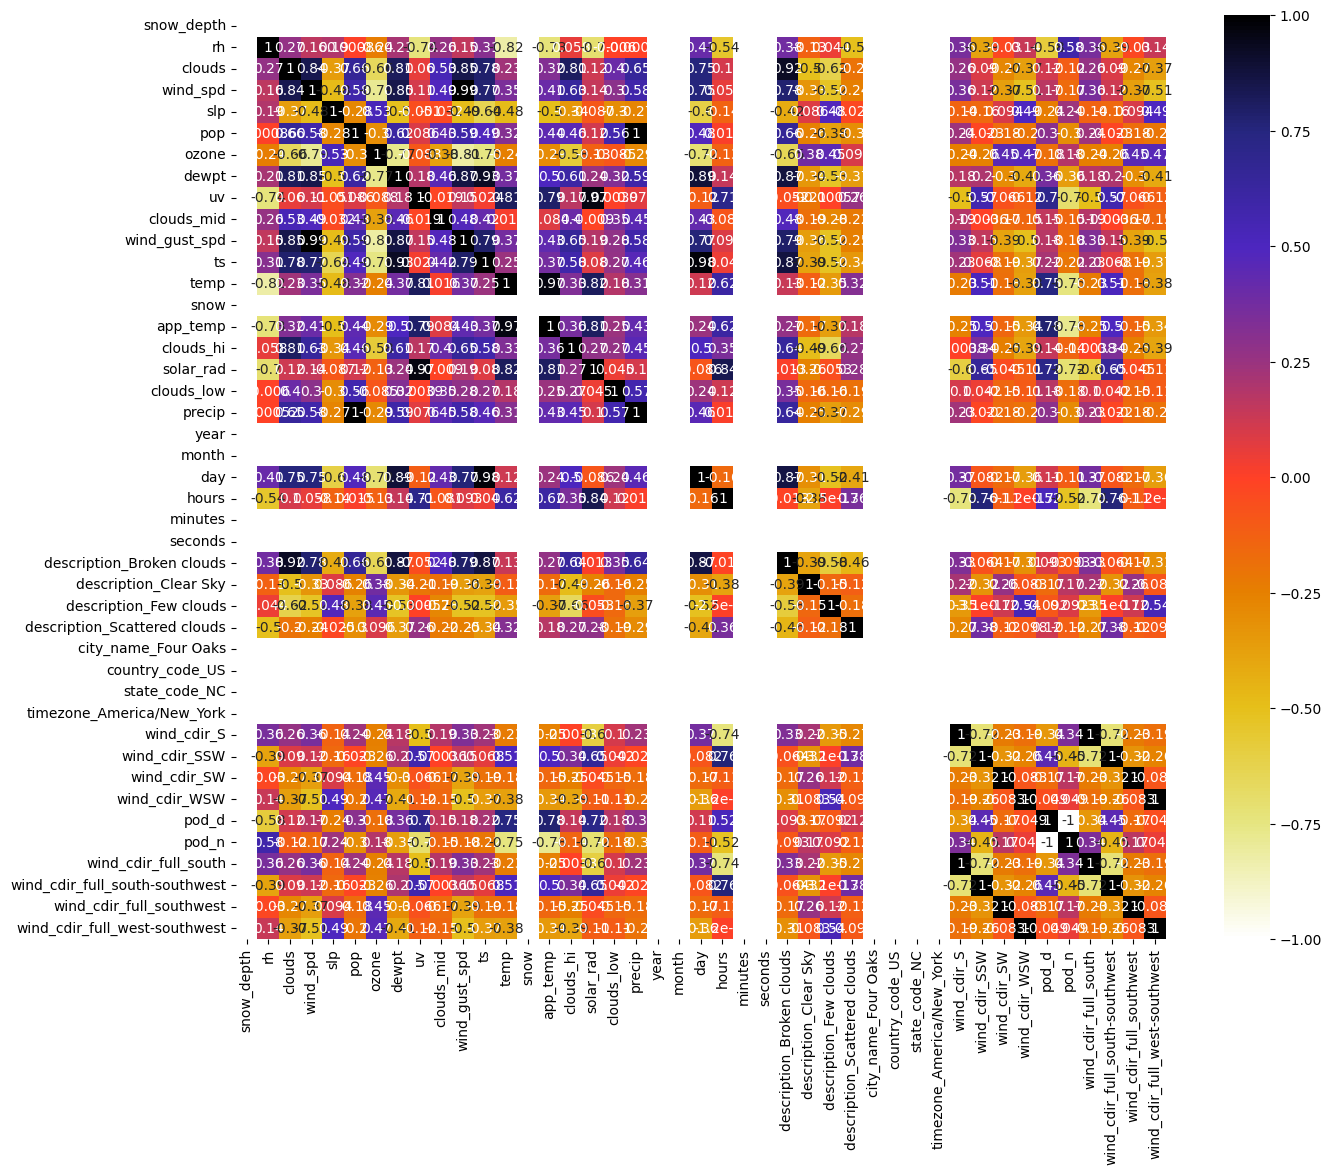

In [55]:
# heatmap to find  correlated columns
import seaborn as sns
plt.figure(figsize=(15,12))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [56]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [57]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))


16

In [58]:
corr_features

{'app_temp',
 'clouds_hi',
 'day',
 'description_Broken clouds',
 'dewpt',
 'hours',
 'precip',
 'solar_rad',
 'temp',
 'ts',
 'wind_cdir_full_south',
 'wind_cdir_full_south-southwest',
 'wind_cdir_full_southwest',
 'wind_cdir_full_west-southwest',
 'wind_gust_spd',
 'wind_spd'}

In [59]:
X_test

,snow_depth,rh,clouds,wind_spd,slp,pop,ozone,dewpt,uv,clouds_mid,...,wind_cdir_S,wind_cdir_SSW,wind_cdir_SW,wind_cdir_WSW,pod_d,pod_n,wind_cdir_full_south,wind_cdir_full_south-southwest,wind_cdir_full_southwest,wind_cdir_full_west-southwest
19,0,90,61,4.00,1014.1,0,289.5,23.3,1.2,5,...,0,1,0,0,1,0,0,1,0,0
16,0,79,34,4.40,1013.5,0,284.3,22.0,0.0,0,...,1,0,0,0,0,1,1,0,0,0
15,0,66,25,3.60,1010.9,0,282.0,21.8,1.3,0,...,1,0,0,0,1,0,1,0,0,0
26,0,98,67,4.40,1013.6,20,287.5,23.5,0.0,85,...,0,1,0,0,0,1,0,1,0,0
4,0,63,1,2.00,1015.5,0,300.3,22.2,7.5,0,...,0,0,0,1,1,0,0,0,0,1
12,0,67,4,3.60,1013.5,0,289.5,23.4,7.4,0,...,0,1,0,0,1,0,0,1,0,0
37,0,65,43,4.53,1011.4,20,287.0,25.2,7.3,5,...,0,0,1,0,1,0,0,0,1,0
27,0,96,70,4.00,1014.1,0,284.5,23.9,1.1,100,...,0,1,0,0,1,0,0,1,0,0


In [60]:
X_train.head()

,snow_depth,rh,clouds,wind_spd,slp,pop,ozone,dewpt,uv,clouds_mid,...,wind_cdir_S,wind_cdir_SSW,wind_cdir_SW,wind_cdir_WSW,pod_d,pod_n,wind_cdir_full_south,wind_cdir_full_south-southwest,wind_cdir_full_southwest,wind_cdir_full_west-southwest
39,0,77,41,3.87,1010.9,20,290.0,24.7,1.1,0,...,1,0,0,0,1,0,1,0,0,0
6,0,51,25,2.80,1013.4,0,298.5,20.6,3.7,0,...,0,1,0,0,1,0,0,1,0,0
25,0,97,70,5.60,1013.6,0,289.8,23.6,0.0,51,...,1,0,0,0,0,1,1,0,0,0
9,0,87,10,3.20,1013.6,0,294.5,21.4,0.0,0,...,0,1,0,0,0,1,0,1,0,0
13,0,54,18,4.00,1012.4,0,289.3,21.9,9.2,0,...,0,1,0,0,1,0,0,1,0,0


In [61]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,snow_depth,rh,clouds,slp,pop,ozone,uv,clouds_mid,snow,clouds_low,...,city_name_Four Oaks,country_code_US,state_code_NC,timezone_America/New_York,wind_cdir_S,wind_cdir_SSW,wind_cdir_SW,wind_cdir_WSW,pod_d,pod_n
19,0,90,61,1014.1,0,289.5,1.2,5,0,0,...,1,1,1,1,0,1,0,0,1,0
16,0,79,34,1013.5,0,284.3,0.0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
15,0,66,25,1010.9,0,282.0,1.3,0,0,0,...,1,1,1,1,1,0,0,0,1,0
26,0,98,67,1013.6,20,287.5,0.0,85,0,24,...,1,1,1,1,0,1,0,0,0,1
4,0,63,1,1015.5,0,300.3,7.5,0,0,1,...,1,1,1,1,0,0,0,1,1,0
12,0,67,4,1013.5,0,289.5,7.4,0,0,4,...,1,1,1,1,0,1,0,0,1,0
37,0,65,43,1011.4,20,287.0,7.3,5,0,16,...,1,1,1,1,0,0,1,0,1,0
27,0,96,70,1014.1,0,284.5,1.1,100,0,1,...,1,1,1,1,0,1,0,0,1,0


In [62]:
## to save data set in csv form
#processed_data = pd.DataFrame(df)

# Save as CSV
#processed_data.to_csv('https://drive.google.com/processed_data.csv', index=False)
#processed_data.shape


## Model Training and evaluation with different models

### decision tree regressor

In [63]:
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r4 = r2_score(y_test, y_pred)
print("R2 Score:", r4)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", mae)


Mean Squared Error: 37.5
R2 Score: 0.8909090909090909
Mean Absolute Error: 3.75


###  Create a linear regression model

In [64]:

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


# Evaluate the model using mean squared error (MSE)
mse1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse1)

r3 = r2_score(y_test, y_pred)
print('R-squared:', r3)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", mae)




Mean Squared Error (MSE): 120.89699588718625
R-squared: 0.6482996483281854
Mean Absolute Error: 10.507960518871187


### random forest regressor

In [65]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse2)

r3 = r2_score(y_test, y_pred)
print('R-squared:', r3)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", mae)



Mean Squared Error (MSE): 112.05999999999997
R-squared: 0.6740072727272728
Mean Absolute Error: 8.6125


### support vector regression

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", mae)


Mean Squared Error: 377.57187414094057
R-squared: -0.09839090659182714
Mean Absolute Error: 14.445405823885157
